In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting


np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

#Import libraries for plotting confusion metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

#Import libraries for hyperparameter tuning
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve

#Import SVM
from sklearn.svm import SVC

%matplotlib inline

In [0]:
#Read the data file , handle the categorical variables and drop garbage columns
dt = pd.read_csv('cardiotocography.csv')

dt['Tendency'][dt['Tendency'] == -1] = 'left_asymmetric'
dt['Tendency'][dt['Tendency'] == 0] = 'symmetric'
dt['Tendency'][dt['Tendency'] == 1] = 'right_asymmetric'

dt['Tendency'] = dt['Tendency'].astype('object')

dt = pd.get_dummies(dt, drop_first=False)
dt.head()

dt_fhr = dt.drop(['Unnamed: 23','NSP'],axis = 1)
dt_nsp = dt.drop(['Unnamed: 23','CLASS'],axis = 1)

In [0]:
X_nsp= dt_nsp.drop('NSP', 1)
y_nsp = dt_nsp['NSP'] 
X_train, X_test, y_train, y_test = train_test_split(X_nsp, y_nsp, test_size = .20, random_state=10) #split the data

In [0]:
svclassifier = SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=10000, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
svclassifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:241: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='poly', max_iter=10000, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
y_predict = svclassifier.predict(X_test)
y_pred_quant = svclassifier.predict_proba(X_test)[:, 1]
y_pred_bin = svclassifier.predict(X_test)

0.5938967136150235
The precision recall, F1 score and support for each class
              precision    recall  f1-score   support

           1      0.851     0.628     0.723       336
           2      0.171     0.410     0.242        61
           3      0.531     0.586     0.557        29

    accuracy                          0.594       426
   macro avg      0.518     0.541     0.507       426
weighted avg      0.732     0.594     0.642       426



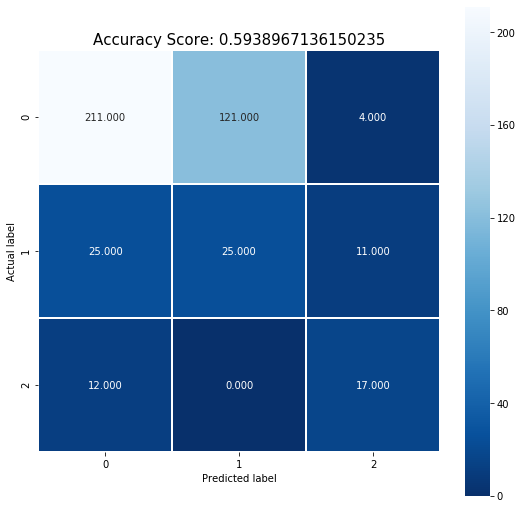

In [0]:
# Use score method to get accuracy of model
score = svclassifier.score(X_test, y_test)
print(score)

print("The precision recall, F1 score and support for each class")
print(metrics.classification_report(y_test, y_pred_bin, digits=3))
#Show the confusion matrix


#Create the confusion matrics
cm = metrics.confusion_matrix(y_test, y_pred_bin)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);